In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:

INIT_LR=1e-4
EPOCHS=20
BATCH_SIZE=32

# grab the list of images in our dataset directory, then initialize

imagePaths=list(paths.list_images("../train"))
imagePathsTest=list(paths.list_images("../test"))

In [7]:
data=[]
labels=[]
datatest=[]
labelstest=[]


# loop over the image paths
for imagePath in imagePaths:
    
    # you may also use the path separator on your system
    label = imagePath.split(os.path.sep)[-2]
    # load the input image (224x224) and preprocess it
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

data=np.array(data, dtype="float32")
labels=np.array(labels)


for imagePath in imagePathsTest:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    datatest.append(image)
    labelstest.append(label)

datatest=np.array(datatest,dtype="float32")
labelstest=np.array(labelstest)   

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Viral Pneumonia')

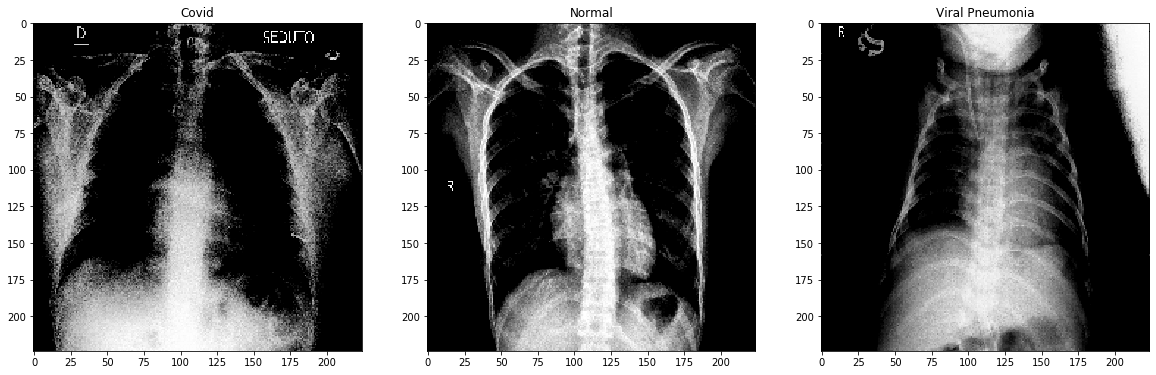

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(data[0], cmap='gray')
plt.title(labels[0])

plt.subplot(1,3,2)
plt.imshow(data[113], cmap='gray')
plt.title(labels[113])

plt.subplot(1,3,3)
plt.imshow(data[-1], cmap='gray')
plt.title(labels[-1])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels=le.fit_transform(labels)
labels=to_categorical(labels)
labelstest=le.transform(labelstest)
labelstest=to_categorical(labelstest)

In [14]:
labelstest

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [19]:

aug=ImageDataGenerator(rotation_range=20,
                       zoom_range=0.15,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       shear_range=0.15,
                       horizontal_flip=True,
                       fill_mode="nearest")

pre_trained_model=MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))


In [20]:
headModel=pre_trained_model.output
headModel=AveragePooling2D(pool_size=(7, 7))(headModel)
headModel=Flatten(name="flatten")(headModel)
headModel=Dense(128, activation="relu")(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(3, activation="softmax")(headModel)
for layer in pre_trained_model.layers:
    layer.trainable=False
model=Model(inputs=pre_trained_model.input,outputs=headModel)    


In [21]:

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS),metrics=["accuracy"])
History=model.fit(
    aug.flow(data,labels, batch_size=32),
    steps_per_epoch=len(data)//32,
    validation_data=(datatest,labelstest),
    validation_steps=len(datatest)//32,
    epochs=EPOCHS)

Epoch 1/20
7/7 [==============================] - 7s 1s/step - loss: 1.5404 - accuracy: 0.3214 - val_loss: 1.0081 - val_accuracy: 0.4697
Epoch 2/20
7/7 [==============================] - 6s 914ms/step - loss: 1.2295 - accuracy: 0.4155 - val_loss: 0.8463 - val_accuracy: 0.6212
Epoch 3/20
7/7 [==============================] - 7s 955ms/step - loss: 1.0392 - accuracy: 0.5297 - val_loss: 0.7525 - val_accuracy: 0.6667
Epoch 4/20
7/7 [==============================] - 6s 890ms/step - loss: 0.8806 - accuracy: 0.5753 - val_loss: 0.6936 - val_accuracy: 0.6818
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.7888 - accuracy: 0.6393 - val_loss: 0.6653 - val_accuracy: 0.7273
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.7829 - accuracy: 0.6530 - val_loss: 0.6598 - val_accuracy: 0.6970
Epoch 7/20
7/7 [==============================] - 7s 933ms/step - loss: 0.6862 - accuracy: 0.6849 - val_loss: 0.6230 - val_accuracy: 0.7273
Epoch 8/20
7/7 [============

3/3 [==============================] - 1s 232ms/step - loss: 0.3785 - accuracy: 0.8636
                 precision    recall  f1-score   support

          Covid       1.00      0.88      0.94        26
         Normal       1.00      0.70      0.82        20
Viral Pneumonia       0.69      1.00      0.82        20

       accuracy                           0.86        66
      macro avg       0.90      0.86      0.86        66
   weighted avg       0.91      0.86      0.87        66



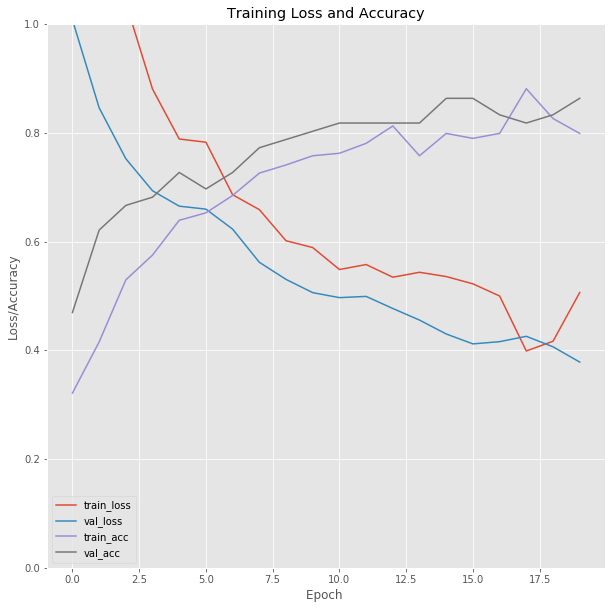

In [24]:
model.evaluate(datatest,labelstest)
predIdxs = model.predict(datatest, batch_size=32)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(labelstest.argmax(axis=1),predIdxs,target_names=le.classes_))
report=classification_report(labelstest.argmax(axis=1),predIdxs,target_names=le.classes_)
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, N),History.history["loss"],label="train_loss")
plt.plot(np.arange(0, N),History.history["val_loss"],label="val_loss")
plt.plot(np.arange(0, N),History.history["accuracy"],label="train_acc")
plt.plot(np.arange(0, N),History.history["val_accuracy"],label="val_acc")
plt.ylim(0,1)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [52]:
#Model 2
from tensorflow.keras.applications import VGG16

pretrained_model_vgg=VGG16(input_tensor=Input(shape=(224,224,3)),include_top=False,weights='imagenet')

for layer in pretrained_model_vgg.layers:
     layer.trainable = False
headModel_vgg=pretrained_model_vgg.output
headModel_vgg=AveragePooling2D(pool_size=(4,4))(headModel_vgg)
headModel_vgg=Flatten()(headModel_vgg)
headModel_vgg=Dense(128, activation="relu")(headModel_vgg)
headModel_vgg=Dropout(0.5)(headModel_vgg)
headModel_vgg=Dense(2, activation="softmax")(headModel_vgg)
for layer in pretrained_model_vgg.layers:
    layer.trainable=False
model_vgg=Model(inputs=pretrained_model_vgg.input,outputs=headModel_vgg)    


In [53]:
model_vgg.compile(loss="binary_crossentropy", optimizer=Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS),metrics=["accuracy"])
History2=model_vgg.fit(
    aug.flow(trainX, trainY, batch_size=32),
    steps_per_epoch=len(trainX)//32,
    validation_data=(testX, testY),
    validation_steps=len(testX)//32,
    epochs=EPOCHS)

Epoch 1/20
7/7 [==============================] - 64s 9s/step - loss: 0.9328 - accuracy: 0.4509 - val_loss: 0.7787 - val_accuracy: 0.4912
Epoch 2/20
7/7 [==============================] - 64s 9s/step - loss: 0.8310 - accuracy: 0.5179 - val_loss: 0.7144 - val_accuracy: 0.4912
Epoch 3/20
7/7 [==============================] - 51s 7s/step - loss: 0.7886 - accuracy: 0.5538 - val_loss: 0.6783 - val_accuracy: 0.5965
Epoch 4/20
7/7 [==============================] - 42s 6s/step - loss: 0.7121 - accuracy: 0.5795 - val_loss: 0.6555 - val_accuracy: 0.6316
Epoch 5/20
7/7 [==============================] - 43s 6s/step - loss: 0.7958 - accuracy: 0.5538 - val_loss: 0.6370 - val_accuracy: 0.7544
Epoch 6/20
7/7 [==============================] - 42s 6s/step - loss: 0.7626 - accuracy: 0.5590 - val_loss: 0.6197 - val_accuracy: 0.7895
Epoch 7/20
7/7 [==============================] - 41s 6s/step - loss: 0.7459 - accuracy: 0.5487 - val_loss: 0.6039 - val_accuracy: 0.8596
Epoch 8/20
7/7 [==================

2/2 [==============================] - 8s 4s/step - loss: 0.4506 - accuracy: 0.8772
              precision    recall  f1-score   support

       Covid       0.92      0.82      0.87        28
      Normal       0.84      0.93      0.89        29

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57



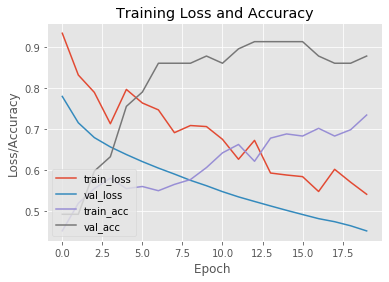

In [54]:
model_vgg.evaluate(testX,testY)
predIndex = model_vgg.predict(testX, batch_size=32)
predIndex = np.argmax(predIndex, axis=1)
print(classification_report(testY.argmax(axis=1),predIndex,target_names=le.classes_))
report=classification_report(testY.argmax(axis=1),predIndex,target_names=le.classes_)
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N),History2.history["loss"],label="train_loss")
plt.plot(np.arange(0, N),History2.history["val_loss"],label="val_loss")
plt.plot(np.arange(0, N),History2.history["accuracy"],label="train_acc")
plt.plot(np.arange(0, N),History2.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")